# Proyecto 2: Modelación de Tsunami

**Fundamentos de Dinámica de Fluidos Computacional**<br>
**Profesor Christopher Cooper**<br>
**23 de Noviembre de 2017**

Valentina Oyarzún 201292003-5
***

# Simulación en 1 Dimensión 

** Condiciones Iniciales **

Dominio $-2 \leq x \leq 2$ <br>
altura del agua en reposo $ h_0 = 1$ <br>
perfil $ h(x, t= 0) = h_0 + \Delta_{h} e^{-5 x^2}$ <br>
malla $501$ elementos

In [1]:
import numpy
import matplotlib.pyplot as plt
numpy.set_printoptions(precision=3)
%matplotlib inline
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx  = 501
dx   = 4./(nx-1)
x   = numpy.linspace(-2, 2, nx)
dt  = 2*10**(-3)
g   = 9.81

h_0 = 1
dh  = 0.4

** Condiciones de borde, $x =2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0  \text{  ,  }  U_2 = 0\\
\end{align}

** Condiciones de borde, $x = -2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0 \text{  ,  } \frac{\partial U_2}{\partial x} = 0\\
\end{align}

** Discretización para $U_1$ y $U_2$ **
\begin{align}
U_{i}^{n+1}= \frac{1}{2} \left(  U_{i+1}^{n} + U_{i-1}^{n} \right) - \frac{\Delta t}{2 \Delta x} \left( F_{i+1}^{n} - F_{i-1}^{n} \right)\\
\end{align}

Pared: <br>
\begin{align}
U_1 \left[-1 \right] = U_1\left[-2\right]  \text{  ,  }  U_2  \left[-1\right] = 0\\
\end{align}

Mar: <br>
\begin{align}
U_1 \left[ 0\right] = U_1 \left[1\right]\\
U_2 \left[ 0\right] = U_2 \left[1\right]\\
\end{align}

In [3]:
def tsunami1D(h_0, dh, dx, dt):
    
    h_t0 = h_0 + dh*numpy.exp(-5*x**2)
    u_t0 = numpy.zeros(nx)
    
    h = h_t0
    u = u_t0
    #h_max = numpy.amax(h)
    
    pasos = 0
    
    while True:
        #while h[-1]!= h_max:
        
        U1 = h
        U2 = h*u
        F1 = h*u
        F2 = h*u**2+.5*g*h**2
        
        U1_n = U1.copy()
        U2_n = U2.copy()
        
        U1[1:-1] = .5*(U1_n[2:]+U1_n[:-2])-(dt/(2*dx))*(F1[2:]-F1[:-2])
        U2[1:-1] = .5*(U2_n[2:]+U2_n[:-2])-(dt/(2*dx))*(F2[2:]-F2[:-2])

        U1[-1] = U1[-2]
        U2[-1] = 0
        U1[0]  = U1[1]
        U2[0]  = U2[1]

        u = U2/U1
        h = U1
        h_max = numpy.amax(h)
        
        pasos +=1 
        
        if h[-1]==h_max:
            break
        
    return u, h, pasos

Se requieren 232  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.464  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0499298897901 m/s
Altura maxima al tocar la costa  1.24982724016 m


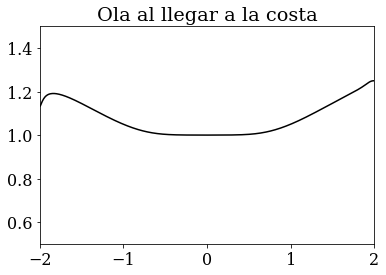

In [4]:
# Cuantos pasos de tiempo tarda en que el maximo llegue a la costa

uf, hf, pasosf = tsunami1D(h_0, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

Se requieren 290  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.58  segundos
Velocidad final del punto maximo al llegar a la costa es 0.111186717917 m/s
Altura maxima al tocar la costa  0.715302660628 m


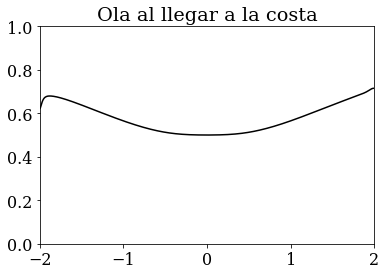

In [5]:
# Para h_0 = 0.5 m

uf, hf, pasosf = tsunami1D(0.5, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0, 1])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()


Se requieren 200  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.4  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0330255085188 m/s
Altura maxima al tocar la costa  1.77008463845 m


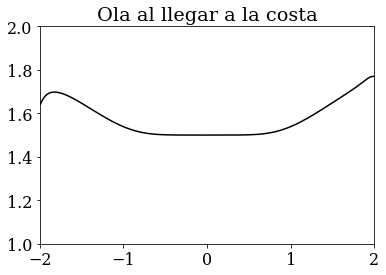

In [6]:
# Para h_0 = 1.5 m
uf, hf, pasosf = tsunami1D(1.5, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 1, 2])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

Se requieren 240  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.48  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0271925905468 m/s
Altura maxima al tocar la costa  1.18639878657 m


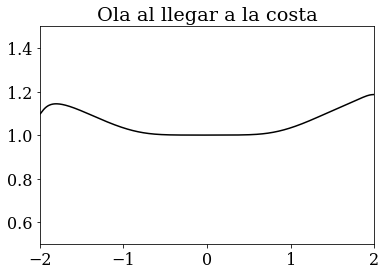

In [7]:
# Para dh = 0.3m

uf, hf, pasosf = tsunami1D(h_0, 0.3, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

Se requieren 219  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.438  segundos
Velocidad final del punto maximo al llegar a la costa es 0.219448056142 m/s
Altura maxima al tocar la costa  1.44850753425 m


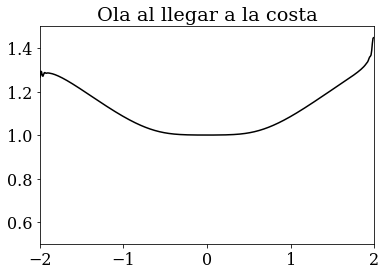

In [8]:
# Para dh = 0.6m

uf, hf, pasosf = tsunami1D(h_0, 0.6, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

# Simulación en 2 Dimensiones

### Condiciones Iniciales

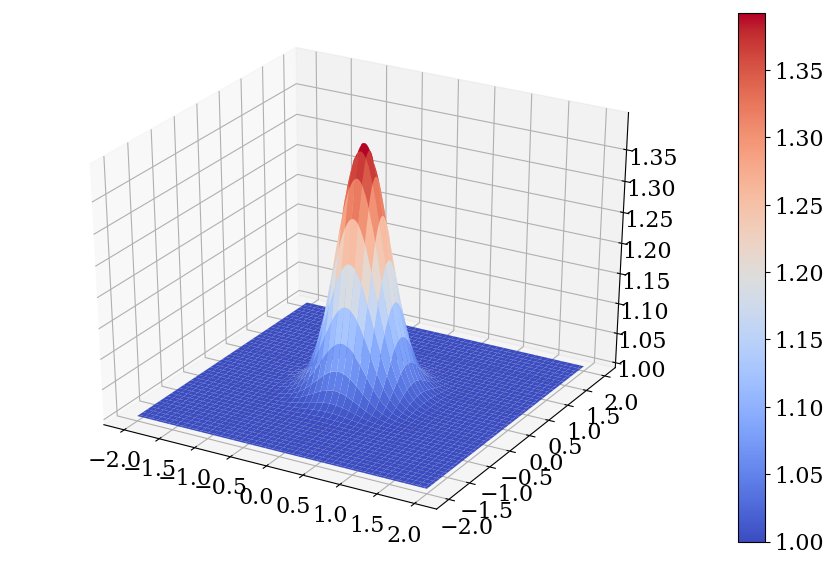

In [9]:
N  = 401
dt = 2*10**(-3)

delta = 4./(N-1)
x = numpy.linspace(-2, 2, N)
y = numpy.linspace(2, -2, N) 
X, Y = numpy.meshgrid(x,y)

g   = 9.81


h00=1;dh=0.4
h_t0 = h00 + dh*numpy.exp(-5*(X**2+Y**2))

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, Y, h_t0, cmap='coolwarm');
plt.colorbar(c)

** Condiciones de borde, $x =2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0  \text{  ,  }  U_2 = 0\\
\end{align}

** Condiciones de borde, $x = -2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0 \text{  ,  } \frac{\partial U_2}{\partial x} = 0\\
\end{align}

** Discretización para $U_1$ y $U_2$ **
\begin{align}
U_{i}^{n+1}= \frac{1}{2} \left(  U_{i+1}^{n} + U_{i-1}^{n} \right) - \frac{\Delta t}{2 \Delta x} \left( F_{i+1}^{n} - F_{i-1}^{n} \right)\\
\end{align}

Pared: <br>
\begin{align}
U_1 \left[-1 \right] = U_1\left[-2\right]  \text{  ,  }  U_2  \left[-1\right] = 0\\
\end{align}

Mar: <br>
\begin{align}
U_1 \left[ 0\right] = U_1 \left[1\right]\\
U_2 \left[ 0\right] = U_2 \left[1\right]\\
\end{align}

In [17]:
def tsunami2D(N,h_0,dh):

    delta = 4./(N-1)
    x = numpy.linspace(-2, 2, N)
    y = numpy.linspace(2, -2, N) 
    X, Y = numpy.meshgrid(x,y)
    
    h_t0 = h00 + dh*numpy.exp(-5*(X**2+Y**2))
    u_t0 = numpy.zeros((N,N))
    v_t0 = numpy.zeros((N,N))
    
    h = h_t0
    u = u_t0
    v= v_t0
    
    #h_max = numpy.amax(h)
    
    pasos = 0
    
    while True:        
        U1 = h
        U2 = h*u
        U3 = h*v
        
        f1 = h*u
        f2 = h*u**2+.5*g*h**2
        f3 = h*u*v
        
        g1 = h*v
        g2 = h*u*v
        g3 = h*v**2+.5*g*h**2
        
        U1_n = U1.copy()
        U2_n = U2.copy()
        U3_n = U3.copy()
        
        U1[1:-1, 1:-1] = .25*(U1_n[2:, 1:-1] + U1_n[:-2, 1:-1] + U1_n[1:-1, 2:] + U1_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f1[2:, 1:-1] - f1[:-2, 1:-1] + g1[1:-1, 2:] - g1[1:-1,:-2])
            
        U2[1:-1, 1:-1] = .25*(U2_n[2:, 1:-1] + U2_n[:-2, 1:-1] + U2_n[1:-1, 2:] + U2_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f2[2:, 1:-1] - f2[:-2, 1:-1] + g2[1:-1, 2:] - g2[1:-1,:-2])
            
        U3[1:-1, 1:-1] = .25*(U3_n[2:, 1:-1] + U3_n[:-2, 1:-1] + U3_n[1:-1, 2:] + U3_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f3[2:, 1:-1] - f3[:-2, 1:-1] + g3[1:-1, 2:] - g3[1:-1,:-2])

        
        # Condicion borde norte
        U2[0,1:-1]=0
        U3[0,1:-1]=0
        U1[0,1:-1]=U1[1,1:-1]
        
        #condicion borde este
        U2[1:-1,-1]=0
        U3[1:-1,-1]=0
        U1[1:-1,-1]=U1[1:-1,-2]
        
        #borde Oeste
        U2[1:-1,0]=U2[1:-1,1]
        U3[1:-1,0]=U3[1:-1,1]
        U1[1:-1,0]=U1[1:-1,1]
        
        #borde Sur
        U2[-1,1:-1]=U2[-2,1:-1]
        U3[-1,1:-1]=U3[-2,1:-1]
        U1[-1,1:-1]=U1[-2,1:-1]
        
        #esquinas NO
        U1[0,0]=U1[1,1]
        U2[0,0]=U2[1,1]
        U3[0,0]=U3[1,1]
        
        #NE
        U1[0,-1]=U1[1,-2]
        U2[0,-1]=U2[1,-2]
        U3[0,-1]=U3[1,-2]
        
        #ES
        U1[-1,-1]=U1[-2,-2]
        U2[-1,-1]=U2[-2,-2]
        U3[-1,-1]=U3[-2,-2]
        
        #OS
        U1[-1,0]=U1[-2,1]
        U2[-1,0]=U2[-2,1]
        U3[-1,0]=U3[-2,1]

        u = U2/U1
        v = U3/U1
        h = U1
        h_max = numpy.amax(h)
        
        pasos +=1 
        
        if numpy.amax(h[:,0])==h_max or numpy.amax(h[-1,:])==h_max:
            break
        
    return u,v, h, pasos, X, Y

Una vez obtenido el algoritmo para la modelación del fenómeno, es posible representar el caso original y sus variaciones propuestas:

A continuación se presenta la simulación de la ola con los parámetros originales de $\Delta h=0.4 [m]$ y $h_0=1 [m]$

Los pasos de tiempo necesarios para que la ola llegue son  905 Equivalente a  1.81  [s]
Por otro lado, la altura máxima h, se encuentra en la esquina Noreste y es de:  1.12846793157 [m]
La diferencia entre la altura máxima y la original h0=1 [m] es de:  0.12846793157 [m]


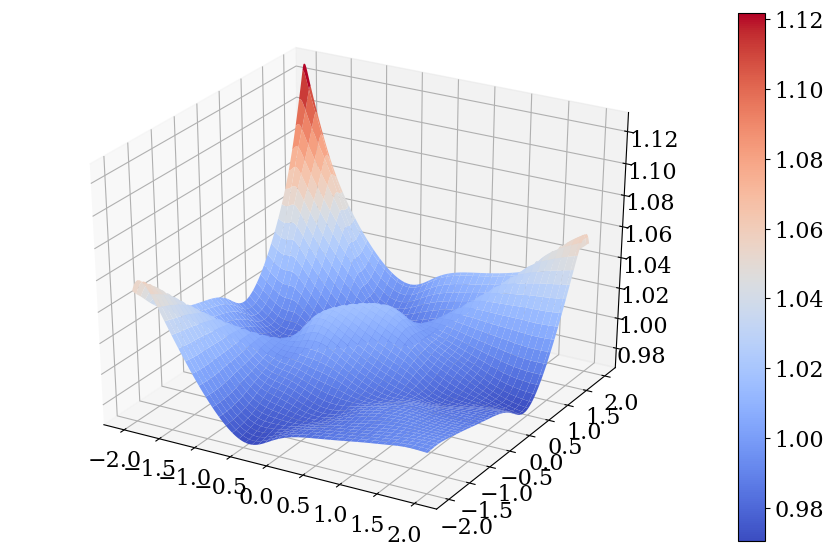

In [11]:
uff,vff,hff,pff,X,Y=tsunami2D(401,1,0.4)
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
print("Los pasos de tiempo necesarios para que la ola llegue son ",pff,"Equivalente a ",dt*pff," [s]")
print("Por otro lado, la altura máxima h, se encuentra en la esquina Noreste y es de: ",numpy.amax(hff),"[m]")
print("La diferencia entre la altura máxima y la original h0=1 [m] es de: ", numpy.amax(hff)-1,"[m]")

Las velocidades de la ola $v$ y $u$ se comportan de distinta forma en el espacio, sin embargo la magnitud de la velocidad $c=\sqrt{v^2+u^2}$ tiene un comportamiento más visible y acorde a lo que gáficamente resulta de la ola.

A continuación se muestra el gráfico de $c$

La magnitud máxima de a velocidad en este fenomeno se encuentra en la misma esquina en donde choca la ola contra la costa (Noreste), esta es de  0.285281916266 [m/s]


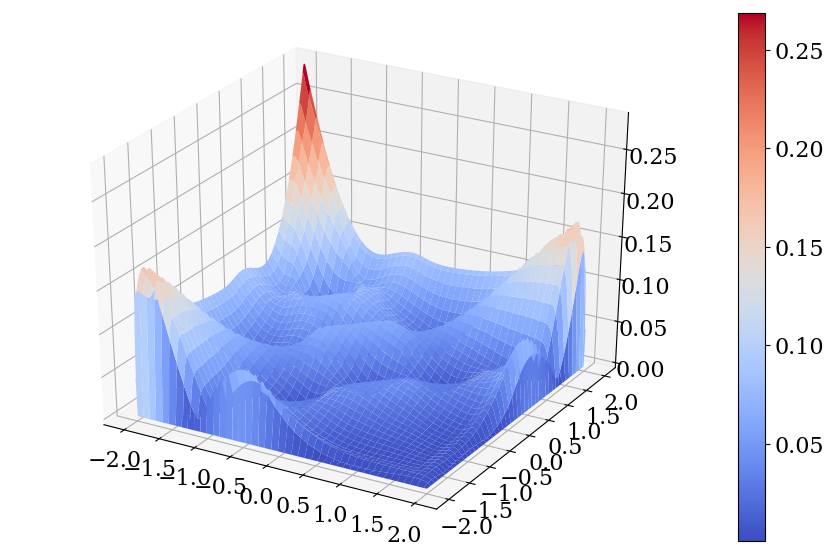

In [12]:
cc=(vff**2+uff**2)**0.5
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, cc, cmap='coolwarm');
plt.colorbar(c)
print("La magnitud máxima de a velocidad en este fenomeno se encuentra en la misma esquina en donde choca la ola contra la costa (Noreste), esta es de ",numpy.amax(cc),"[m/s]")

Este gráfico muestra que la máxima magnitud de la velocidad $c$, se encuentra en el mismo punto que la altura máxima vista con anterioridad.

A continuación se realizan las mismas modificaciones que se hicieron en el caso 1D. La primera de ellas consta de la sensibilidad que tiene la simulación al cambio de la altura inicial del agua $h_0$. Yendo de $0.5[m]$ (menor que la original) hasta $1.5[m]$ (mayor que la original).

Simulación realizada para h_0=0.5[m] (menor a la original).
La altura máxima es de:  1.12846793157 [m]
La velocidad máxima es de:  0.285281916266 [m/s]


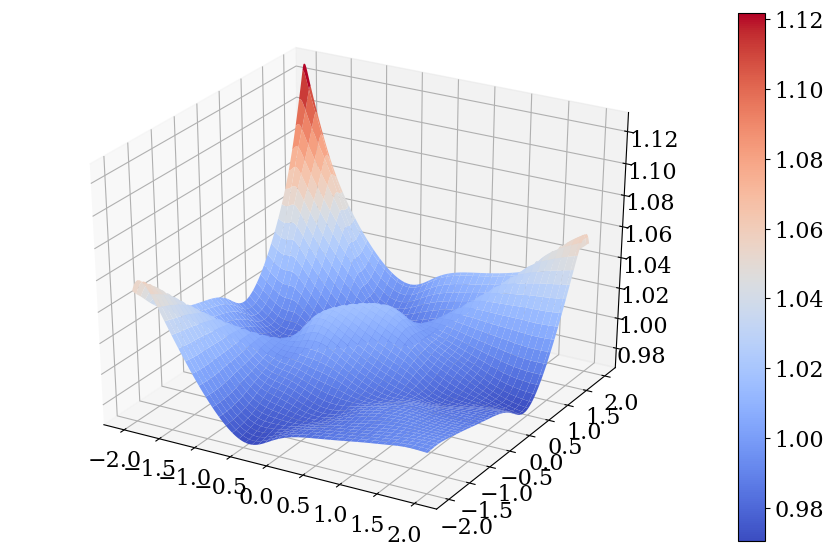

In [26]:
uff,vff,hff,pff,X,Y=tsunami2D(401,0.5,0.4)
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
print("Simulación realizada para h_0=0.5[m] (menor a la original).")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

Simulación realzada para h_0=1.5[m] (mayor que la original)
La altura máxima es de:  1.08364847076 [m]
La velocidad máxima es de:  0.188430098191 [m/s]


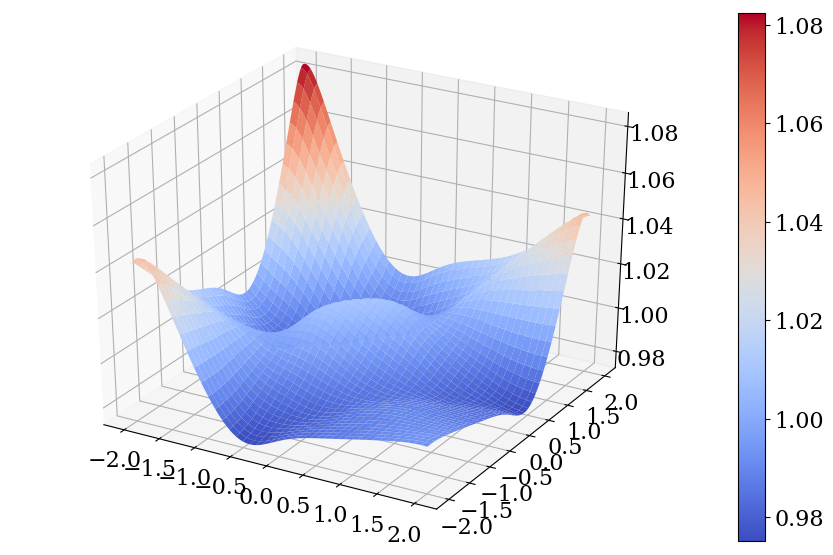

In [27]:
uff,vff,hff,pff,X,Y=tsunami2D(301,1.5,0.4)
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
print("Simulación realzada para h_0=1.5[m] (mayor que la original)")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

Fue necesaria una segunda modificación para esta variante ya que se generaban errores, se debió cambiar la cantidad de nodos de 401 a 301.

Curiosamente la simulación que tomó una altura inicial inferior $h_0=0.5[m]$ logró una mayor altura en el choque contra la costa. Esto se debe a que la misma perturbación o energía actuó sobre una menor cantidad de agua, lo cual se traduce en una mayor altura (energía potencial).

A continuación se realizan cambios en el término $dh$, altura de la perturbación inicial de las simulaciones. Ejemplificando con una diferencia menor a la original $dh=0.2[m]$ y una mayor a la original $dh=0.6[m]$

La altura máxima es de:  1.05212180373 [m]
La velocidad máxima es de:  0.116685747235 [m/s]
Simulación entregada tras cambiar dh de la original por dh=0.2 (menor)


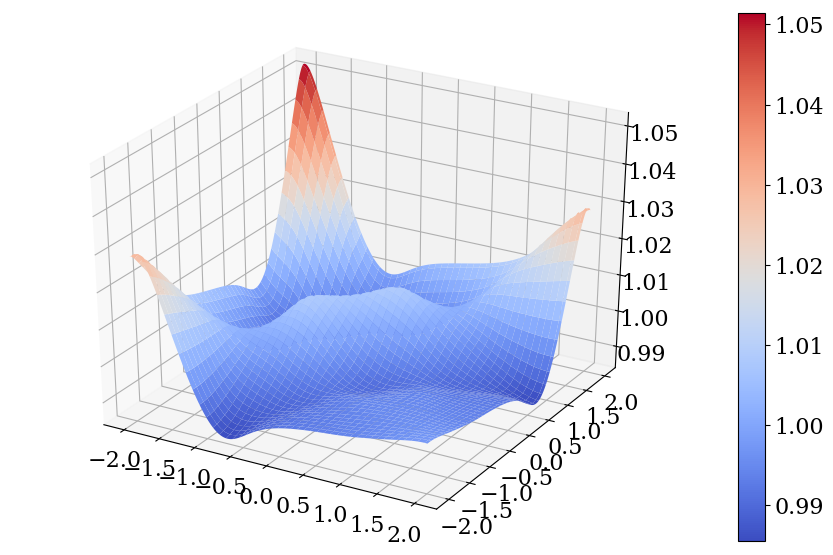

In [24]:
uff,vff,hff,pff,X,Y=tsunami2D(401,1,0.2)
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
print("Simulación entregada tras cambiar dh de la original por dh=0.2 (menor)")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

La altura máxima es de:  1.13317278762 [m]
La velocidad máxima es de:  0.29868704491 [m/s]
Simulación entregada tras cambiar dh de la original por dh=0.6 (mayor)


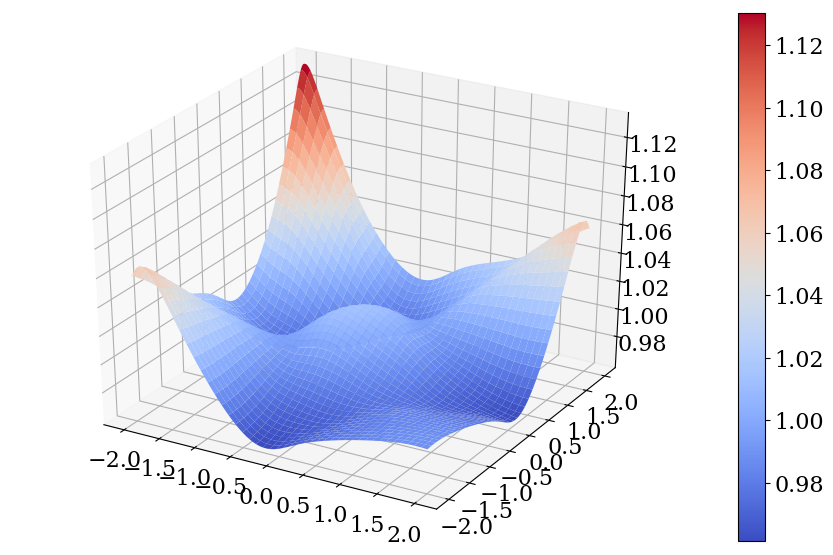

In [25]:
uff,vff,hff,pff,X,Y=tsunami2D(301,1,0.6)
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
print("Simulación entregada tras cambiar dh de la original por dh=0.6 (mayor)")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

En el caso anterior fue necesario añadir otra variación en la simulación: se cambió tambien el número de nodos de la malla ya que presentaba errores en su ejecución.

Como es de esperarse, a una mayor altura de la perturbación inicial se logran mayores alturas en el choque de la ola contra la costa. Esto debido a que la energía potencial (elevación de la ola) que entra al sistema se conserva y se transforma tanto en enegía potencial, altura de la ola que va hacia la costa, como cinética, magnitud de la velocidad de esta.

El punto crítico de este fenómeno es el punto en que encuentran las dos caras reflexivas que simulan ser la costa.
Los riesgos de esta geometría y el ángulo de $90^\cdot$ en las esquinas radica en cómo la malla logra representar lo que ocurre y la distorcion que presenta respecto a su geometría cuadrada.